In [1]:
keypoints = [None, (511, 0), (730, 43), (754, 346), (730, 606), (316, 0), (219, 346), (267, 562), (608, 562), (608, 909), (657, 1299), (389, 519), (413, 909), (365, 1299), None, None, None, None]

#i = 8: right hip, i = 9: right knee, i = 10: right ankle
#i = 11: left hip, i = 12: left knee, i = 13: left ankle

impkeypoints = []
for i in range(len(keypoints)):
    if(i >7 and i<14): 
        impkeypoints.append(keypoints[i])
        
print(impkeypoints)

[(608, 562), (608, 909), (657, 1299), (389, 519), (413, 909), (365, 1299)]


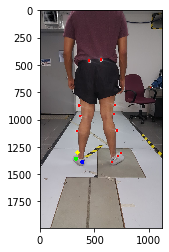

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
frame = cv2.imread("C:\\Users\sunny.DESKTOP-QGFGEEK\Desktop\GitClone\\1_camera_gait_analysis\Azmall_image\BAzmall.jpg")

imgray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
imblur1 = cv2.medianBlur(imgray,5)
imblur2 = cv2.GaussianBlur(imblur1,(5,5),0)
ret,thresh = cv2.threshold(imblur2,250,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(frame, contours, -1, (0,0,255), 10)
#contours coordinate
coor = ContoursCoor(contours)

#find closest 3 dot to right knee
ThreeClosVer(coor,impkeypoints,5,1)
    

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [3]:
# Python code to sort the tuples using second element  
# of sublist Inplace way to sort using sort() 
def Sort(sub_li): 
  
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of  
    # sublist lambda has been used 
    sub_li.sort(key = lambda x: x[1]) 
    return sub_li 

In [4]:
#return list of contour coordinate
def ContoursCoor(contours):
    i = 0
    coor = []
    for c in contours:
        # calculate moments for each contour
        M = cv2.moments(c)
        # calculate x,y coordinate of center
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX = 0
            cY = 0
        #add list of new coordinate to the previous one
        coor.append((cX,cY))
        
        i+=1

    #print(coor)
    return coor

In [5]:
import math
#find distance between two points
def Distance(x1,y1,x2,y2):
    output = math.sqrt(math.pow((x1-x2),2) + math.pow(y1-y2,2))
    return output

In [16]:
#find closest 3 dots 
#return list of dots coordinate sorted in low to high
#direction 1 to sort verticle
#direction 0 to sort horiz0ntal
def ThreeClosVer(coor,impkeypoints,impkeypointsindex,direction):
    Dis = []
    for i in range(len(coor)):
        Dis.append(Distance(impkeypoints[impkeypointsindex][0],impkeypoints[impkeypointsindex][1],coor[i][0],coor[i][1]))
    #print(RightKneeDis)
    dot1_val = Dis[0]
    for i in range(len(Dis)):
        if Dis[i]<=dot1_val:
            dot1_val = Dis[i]
            index1 = i
    dot2_val = Dis[0]
    for i in range(len(Dis)):
        if Dis[i]>dot1_val and Dis[i]<=dot2_val:
            dot2_val = Dis[i]
            index2 = i
    dot3_val = Dis[0]
    for i in range(len(Dis)):
        if Dis[i]>dot2_val and Dis[i]<=dot3_val:
            dot3_val = Dis[i]
            index3 = i    
    
    impcoor = [coor[index1],coor[index2],coor[index3],]
    if direction:    
        Sort(impcoor)
    else:
        impcoor.sort()
    
    cv2.circle(frame,impcoor[0], 20, (0,255,255), -1)
    cv2.circle(frame,impcoor[1], 20, (0,255,0), -1)
    cv2.circle(frame,impcoor[2], 20, (255,0,0), -1)
    return impcoor